In [1]:
%matplotlib inline
import json
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
json_data=open('../json.data/4067.json')
data = json.load(json_data)
json_data.close()

In [3]:
data[0]

{u'filename': u'1.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 5,
   u'end_line': 73,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1.cpp',
   u'general_fan_out': 0,
   u'length': 49,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 24,
   u'parameters': [],
   u'start_line': 25,
   u'token_count': 178,
   u'top_nesting_level': 0}],
 u'library_count': 9,
 u'macro_count': 0,
 u'nloc': 34,
 u'token_count': 201}

In [4]:
function_count = []
nloc = []
token_count = []
library_count = []
macro_count = []
for x in data:
    function_count.append(x['function_count'])
    nloc.append(x['nloc'])
    token_count.append(x['token_count'])
    macro_count.append(x['macro_count'])
    library_count.append(x['library_count'])

In [5]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [6]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [7]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [8]:
def stat_display(data):
    stat_data = stats.describe(data)
    print 'min : ' , stat_data.minmax[0]
    print 'max : ' , stat_data.minmax[1]
    print 'mean : ' , stat_data.mean
    print 'variance : ' , stat_data.variance
    print 'skewness : ' , stat_data.skewness
    print 'kurtosis : ' , stat_data.kurtosis

In [9]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [10]:
def find_min_json(arr):
    return data[np.argmin(arr)]

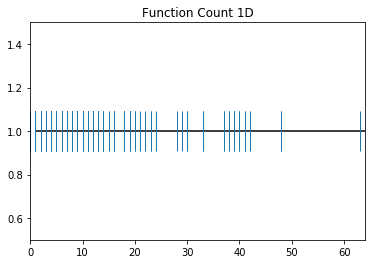

In [11]:
plot_data_1D(function_count,'Function Count 1D')

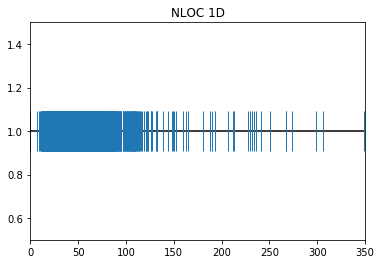

In [12]:
plot_data_1D(nloc,'NLOC 1D')

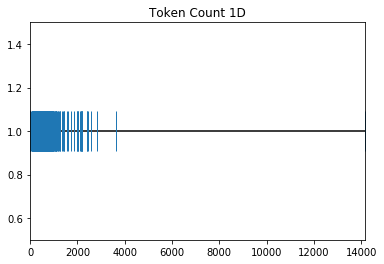

In [13]:
plot_data_1D(token_count,'Token Count 1D')

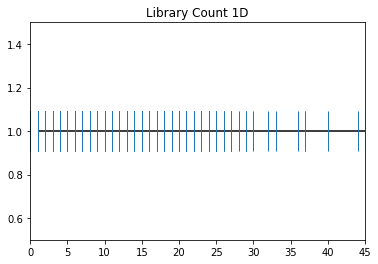

In [14]:
plot_data_1D(library_count,'Library Count 1D')

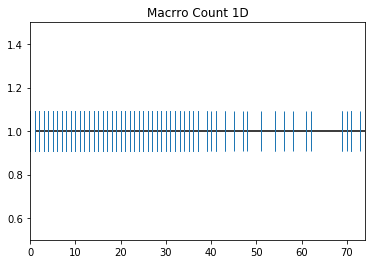

In [15]:
plot_data_1D(macro_count,'Macrro Count 1D')

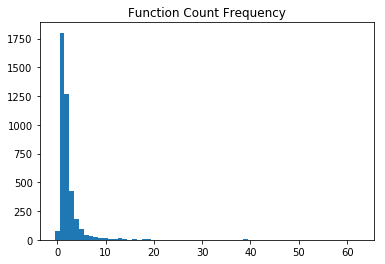

In [16]:
plotdata_frequency(function_count,'Function Count Frequency')

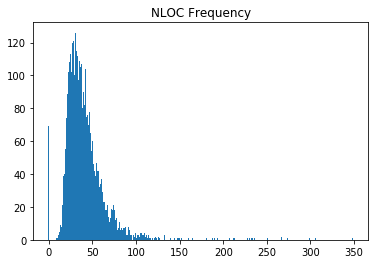

In [17]:
plotdata_frequency(nloc,'NLOC Frequency') # doesn't make sense

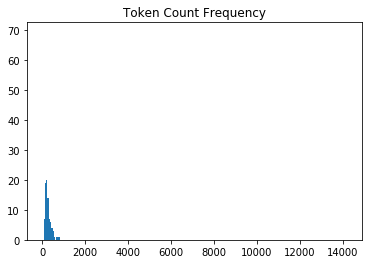

In [18]:
plotdata_frequency(token_count,'Token Count Frequency')

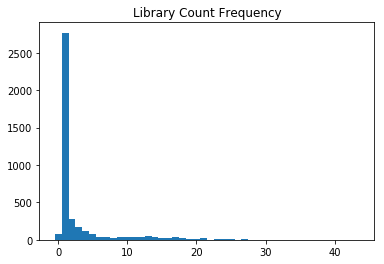

In [19]:
plotdata_frequency(library_count,'Library Count Frequency')

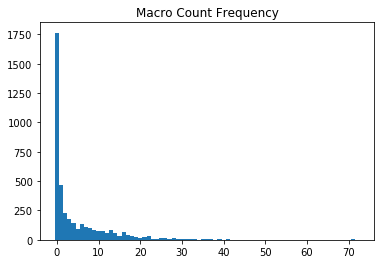

In [20]:
plotdata_frequency(macro_count,'Macro Count Frequency')

In [21]:
stat_display(function_count)

min :  0
max :  63
mean :  2.3439881976887142
variance :  11.71366466095265
skewness :  8.0568310585
kurtosis :  88.2568401443


In [22]:
stat_display(nloc)

min :  0
max :  349
mean :  41.3407917383821
variance :  587.3476789598137
skewness :  3.78737928091
kurtosis :  29.0362316775


In [23]:
stat_display(token_count)

min :  0
max :  14160
mean :  295.0233587410868
variance :  93210.1880917166
skewness :  24.7553444433
kurtosis :  1055.079993


In [24]:
stat_display(library_count)

min :  0
max :  44
mean :  3.104007868207524
variance :  24.532957371310427
skewness :  2.95641659102
kurtosis :  9.67379333328


In [25]:
stat_display(macro_count)

min :  0
max :  73
mean :  4.831817064175068
variance :  65.05827911261578
skewness :  2.99154477812
kurtosis :  13.7129153591


In [26]:
find_max_json(function_count)

{u'filename': u'676.cpp',
 u'function_count': 63,
 u'function_details': [{u'cyclomatic_complexity': 2,
   u'end_line': 23,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'676.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'abs_m( T a)',
   u'name': u'abs_m',
   u'nloc': 1,
   u'parameters': [u'a'],
   u'start_line': 23,
   u'token_count': 17,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 2,
   u'end_line': 24,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'676.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'maxi( i64 a , i64 b)',
   u'name': u'maxi',
   u'nloc': 1,
   u'parameters': [u'a', u'b'],
   u'start_line': 24,
   u'token_count': 19,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 2,
   u'end_line': 25,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'676.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'maxu( u64 a , u64 b)',
   u'name': u'maxu',
   u'nloc': 1,
   u'parameters': [u'a'

In [27]:
find_min_json(function_count)

{u'filename': u'1019.cpp',
 u'function_count': 0,
 u'function_details': [],
 u'library_count': 0,
 u'macro_count': 0,
 u'nloc': 0,
 u'token_count': 0}

In [28]:
find_max_json(nloc)

{u'filename': u'3056.cpp',
 u'function_count': 37,
 u'function_details': [{u'cyclomatic_complexity': 1,
   u'end_line': 55,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'3056.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'Pair::Pair()',
   u'name': u'Pair::Pair',
   u'nloc': 1,
   u'parameters': [],
   u'start_line': 55,
   u'token_count': 5,
   u'top_nesting_level': 1},
  {u'cyclomatic_complexity': 1,
   u'end_line': 65,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'3056.cpp',
   u'general_fan_out': 0,
   u'length': 9,
   u'long_name': u'Pair::Pair( Typ1 first , Typ2 second)',
   u'name': u'Pair::Pair',
   u'nloc': 5,
   u'parameters': [u'first', u'second'],
   u'start_line': 57,
   u'token_count': 22,
   u'top_nesting_level': 1},
  {u'cyclomatic_complexity': 2,
   u'end_line': 81,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'3056.cpp',
   u'general_fan_out': 0,
   u'length': 15,
   u'long_name': u'Pair::operator <( const Pair B) const',
   u

In [29]:
find_min_json(nloc)

{u'filename': u'1019.cpp',
 u'function_count': 0,
 u'function_details': [],
 u'library_count': 0,
 u'macro_count': 0,
 u'nloc': 0,
 u'token_count': 0}

In [30]:
find_min_json(token_count)

{u'filename': u'1019.cpp',
 u'function_count': 0,
 u'function_details': [],
 u'library_count': 0,
 u'macro_count': 0,
 u'nloc': 0,
 u'token_count': 0}

In [31]:
find_max_json(library_count)

{u'filename': u'526.cpp',
 u'function_count': 2,
 u'function_details': [{u'cyclomatic_complexity': 2,
   u'end_line': 119,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'526.cpp',
   u'general_fan_out': 0,
   u'length': 19,
   u'long_name': u'check( int x)',
   u'name': u'check',
   u'nloc': 10,
   u'parameters': [u'x'],
   u'start_line': 101,
   u'token_count': 33,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 3,
   u'end_line': 149,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'526.cpp',
   u'general_fan_out': 0,
   u'length': 29,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 13,
   u'parameters': [],
   u'start_line': 121,
   u'token_count': 57,
   u'top_nesting_level': 0}],
 u'library_count': 44,
 u'macro_count': 1,
 u'nloc': 72,
 u'token_count': 211}

In [32]:
find_min_json(library_count)

{u'filename': u'1019.cpp',
 u'function_count': 0,
 u'function_details': [],
 u'library_count': 0,
 u'macro_count': 0,
 u'nloc': 0,
 u'token_count': 0}

In [33]:
find_max_json(macro_count)

{u'filename': u'1429.cpp',
 u'function_count': 3,
 u'function_details': [{u'cyclomatic_complexity': 1,
   u'end_line': 173,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1429.cpp',
   u'general_fan_out': 0,
   u'length': 1,
   u'long_name': u'tostr( int n)',
   u'name': u'tostr',
   u'nloc': 1,
   u'parameters': [u'n'],
   u'start_line': 173,
   u'token_count': 22,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 3,
   u'end_line': 203,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1429.cpp',
   u'general_fan_out': 0,
   u'length': 15,
   u'long_name': u'yo( int k)',
   u'name': u'yo',
   u'nloc': 8,
   u'parameters': [u'k'],
   u'start_line': 189,
   u'token_count': 77,
   u'top_nesting_level': 0},
  {u'cyclomatic_complexity': 4,
   u'end_line': 223,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1429.cpp',
   u'general_fan_out': 0,
   u'length': 19,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 10,
   u'parameters': [],
   u'start_line': 20

In [34]:
find_min_json(macro_count)

{u'filename': u'1.cpp',
 u'function_count': 1,
 u'function_details': [{u'cyclomatic_complexity': 5,
   u'end_line': 73,
   u'fan_in': 0,
   u'fan_out': 0,
   u'filename': u'1.cpp',
   u'general_fan_out': 0,
   u'length': 49,
   u'long_name': u'main()',
   u'name': u'main',
   u'nloc': 24,
   u'parameters': [],
   u'start_line': 25,
   u'token_count': 178,
   u'top_nesting_level': 0}],
 u'library_count': 9,
 u'macro_count': 0,
 u'nloc': 34,
 u'token_count': 201}

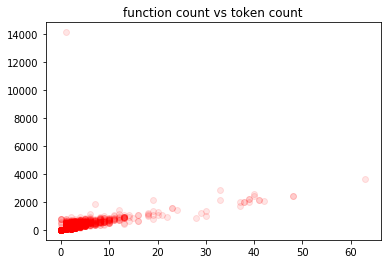

In [35]:
plot_data_2D(function_count,token_count,'function count vs token count','r')

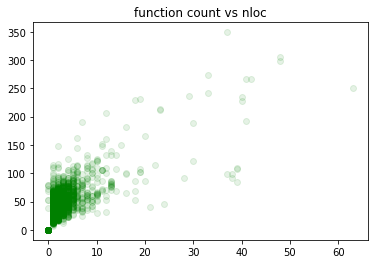

In [36]:
plot_data_2D(function_count,nloc,'function count vs nloc','g')

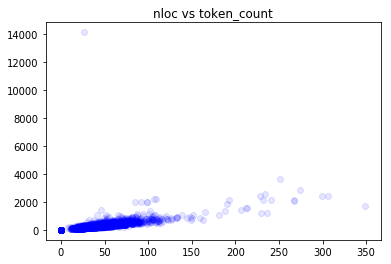

In [37]:
plot_data_2D(nloc,token_count,'nloc vs token_count','b')

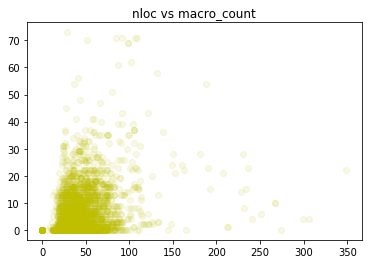

In [38]:
plot_data_2D(nloc,macro_count,'nloc vs macro_count','y')

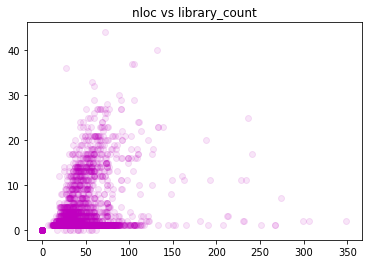

In [39]:
plot_data_2D(nloc,library_count,'nloc vs library_count','m')

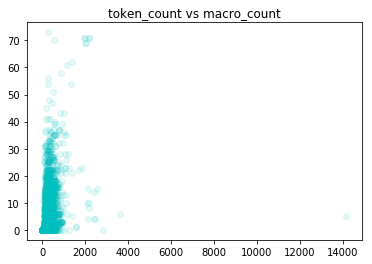

In [40]:
plot_data_2D(token_count,macro_count,'token_count vs macro_count','c')

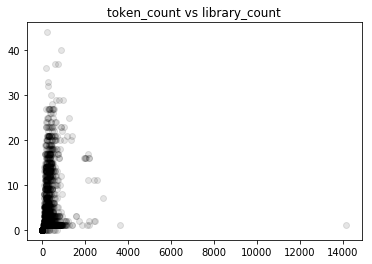

In [41]:
plot_data_2D(token_count,library_count,'token_count vs library_count','k')

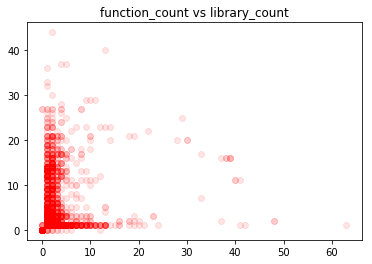

In [42]:
plot_data_2D(function_count,library_count,'function_count vs library_count','r')

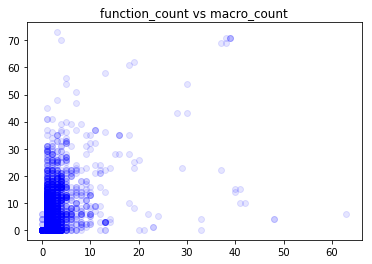

In [43]:
plot_data_2D(function_count,macro_count,'function_count vs macro_count','b')

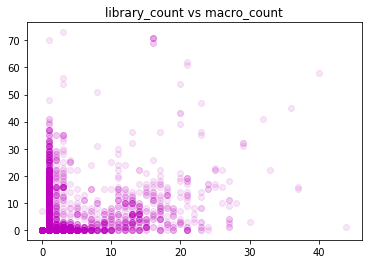

In [44]:
plot_data_2D(library_count,macro_count,'library_count vs macro_count','m')